In [35]:
import cv2
import numpy as np
import sys
import matplotlib.pylab as plt

import pandas as pd

In [36]:
# image_data
img1 = cv2.imread('content/train/085732/IR_085732_input.jpg',cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

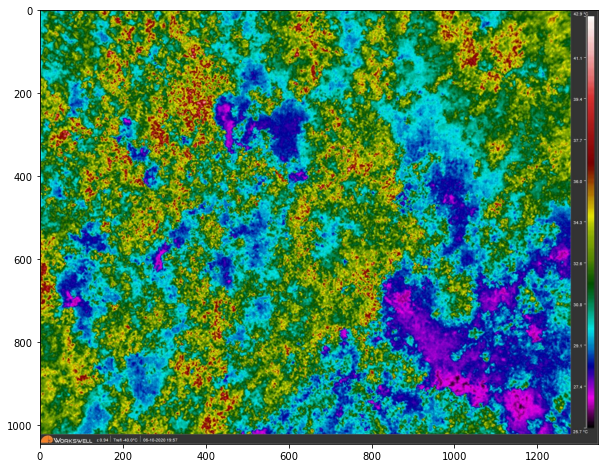

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(img1)
plt.show()

# EDA1 - cut raw img to pix_img , shot_img
- img contains pix_info, drone_shot_data

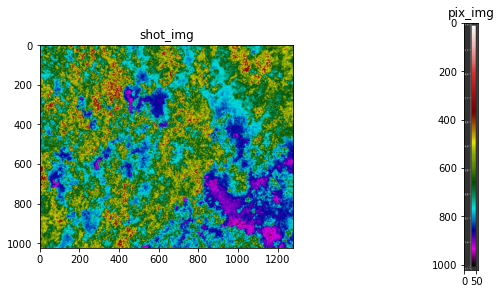

In [38]:
# EDA1 
plt.figure(figsize=(10, 10))
# shot_img 
shot_img = img1[0:1022, 0:1280]
plt.subplot(221)
plt.title('shot_img')
plt.imshow(shot_img)
# pix_img
plt.subplot(222)
plt.title('pix_img')
pix_img = img1[0:1022 , 1290:1346]
plt.imshow(pix_img)

# EDA2 - check histogram(shot_img) 
- IN GRAYSCALE

In [39]:
img1 = cv2.imread('content/train/085732/IR_085732_input.jpg',cv2.IMREAD_GRAYSCALE)

shot_img = img1[0:1022, 0:1280]
pix_img = img1[0:1022 , 1290:1346]

In [40]:
# resize 전

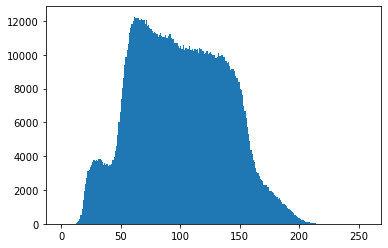

In [41]:
hist,bins = np.histogram(shot_img.ravel(),256,[0,256])
plt.hist(shot_img.ravel(), 256, [0,256]);

In [42]:
# resize 후

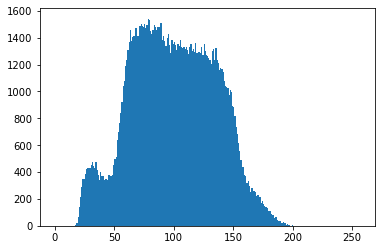

In [43]:
shot_img2 = cv2.resize(shot_img, dsize=(435, 346), interpolation=cv2.INTER_AREA)
hist,bins = np.histogram(shot_img.ravel(),256,[0,256])
plt.hist(shot_img2.ravel(), 256, [0,256]);

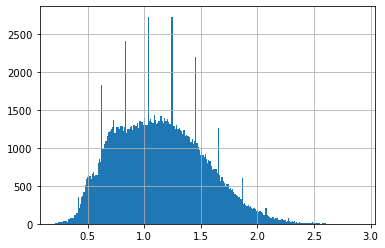

In [44]:
output = pd.read_csv('content/train/085732/CWSI_085732_output.csv')
output = (output.stack())
output.hist(bins=256)

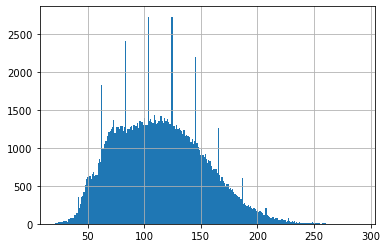

In [45]:
# value * 100 
output = pd.read_csv('content/train/085732/CWSI_085732_output.csv')
output = (output.stack()) *100
output.hist(bins=256)

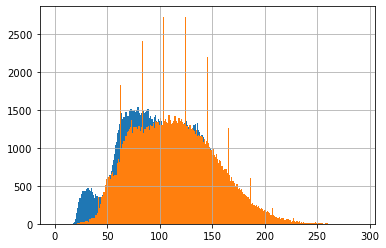

In [46]:
plt.hist(shot_img2.ravel(), 256, [0,256]);
output.hist(bins=256)

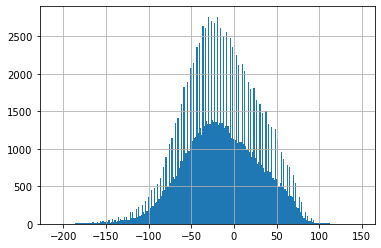

In [47]:
# drone shot - output val 
a = shot_img2.ravel() - output
a.hist(bins = 256)